In [1]:
from OpenMiChroM.ChromDynamics import MiChroM

# Initializes the simulation for chromosome 10
sim_chr10 = MiChroM(name="chr10", temperature=1.0, timeStep=0.01)

# Sets up the simulation platform
sim_chr10.setup(platform="cuda")

# Defines the folder where simulation data will be saved
sim_chr10.saveFolder('output_chr10')

# Creates the initial spiral structure using the provided chromatin sequence
chr10 = sim_chr10.createSpringSpiral(ChromSeq='chr10_beads.txt')

# Loads the chromatin structure into the simulator
sim_chr10.loadStructure(chr10, center=True)

# Adds various forces and potentials to the system
sim_chr10.addFENEBonds(kFb=30.0)
sim_chr10.addAngles(kA=2.0)
sim_chr10.addRepulsiveSoftCore(eCut=4.0)
sim_chr10.addFlatBottomHarmonic()
sim_chr10.addTypetoType(mu=3.22, rc=1.78)
sim_chr10.addIdealChromosome(mu=3.22, rc=1.78, dinit=3, dend=500)

    ***************************************************************************************     
    **** **** *** *** *** *** *** *** OpenMiChroM-1.1.1rc *** *** *** *** *** *** **** ****     

         OpenMiChroM is a Python library for performing chromatin dynamics simulations.         
                            OpenMiChroM uses the OpenMM Python API,                             
                employing the MiChroM (Minimal Chromatin Model) energy function.                
      The chromatin dynamics simulations generate an ensemble of 3D chromosomal structures      
      that are consistent with experimental Hi-C maps, also allows simulations of a single      
                 or multiple chromosome chain using High-Performance Computing                  
                            in different platforms (GPUs and CPUs).                             

         OpenMiChroM documentation is available at https://open-michrom.readthedocs.io          

         OpenMiChroM is des

In [2]:

# Saves the initial structure in NDB format
#sim_chr10.saveStructure(mode="ndb")

# Prints a message indicating the start of chromosome collapse
print("Collapsing the chromosome...")

# Creates the simulation context and initializes the system
sim_chr10.createSimulation()


Collapsing the chromosome...
FENEBond was added
AngleForce was added
RepulsiveSoftCore was added
FlatBottomHarmonic was added
TypetoType was added
IdealChromosome was added
Setting positions... loaded!
Setting velocities... loaded!
Context created!

Simulation name: chr10
Number of beads: 2712, Number of chains: 1
Potential energy: 67.54760, Kinetic Energy: 1.51213 at temperature: 1.0

Potential energy per forceGroup:
                                  Values
FENEBond                   55318.664162
AngleForce                     0.989383
RepulsiveSoftCore              0.000000
FlatBottomHarmonic        128093.004483
TypetoType                  -222.474259
IdealChromosome               -1.086155
Potential Energy (total)  183189.097613


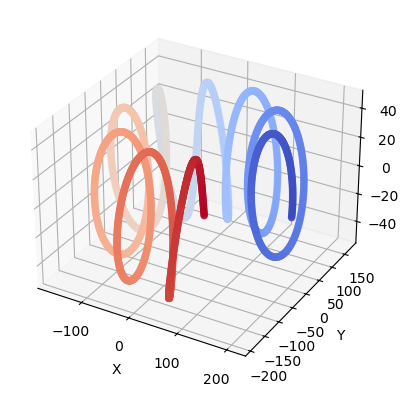

In [3]:
from auxiliar_functions import plot_traj
plot_traj(sim_chr10, beads=True, tube=True)

In [5]:
# Sets parameters for block execution
block = 1 * 10**2  # Block size in steps
n_blocks = 1 * 10**3  # Number of blocks

# Runs the simulation in blocks with potential energy monitoring
for step in range(n_blocks):
    sim_chr10.run(block)

# Saves the final structure in NDB format
sim_chr10.saveStructure(mode="ndb")

#"Progress (%)"	"Step"	"Speed (ns/day)"	"Time Remaining"
10000.0%	10000	0	--
20000.0%	20000	1.49e+04	23:59:59
30000.0%	30000	1.44e+04	23:59:59
40000.0%	40000	1.38e+04	23:59:58
50000.0%	50000	1.33e+04	23:59:57
60000.0%	60000	1.27e+04	23:59:56
70000.0%	70000	1.23e+04	23:59:56
80000.0%	80000	1.2e+04	23:59:55
90000.0%	90000	1.18e+04	23:59:54
100000.0%	100000	1.17e+04	23:59:53


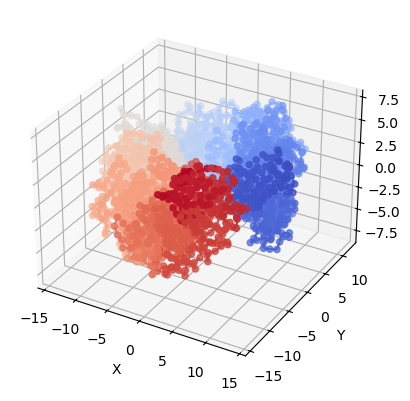

In [6]:
plot_traj(sim_chr10, beads=True, tube=True)

In [7]:
# Removes the potential that collapses the chromosome
sim_chr10.removeFlatBottomHarmonic()

# Sets parameters for block execution in the new phase of the simulation
block = 2 * 10**2  # Block size in steps
n_blocks = 3 * 10**3  # Number of blocks

# Adds a reporter to save the trajectory into a single PDB file in the second simulation phase
sim_chr10.createReporters(statistics=True, traj=True, trajFormat="cndb")

# Runs the simulation in blocks and saves the structures
for step in range(n_blocks):
    sim_chr10.run(block)

# Saves the final structure in NDB format after the second simulation phase
#sim_chr10.saveStructure(mode="ndb")

Removed FlatBottomHarmonic from the system!
110000.0%	110000	5.28e+03	23:59:43
120000.0%	120000	5.54e+03	23:59:42
130000.0%	130000	5.78e+03	23:59:41
140000.0%	140000	5.99e+03	23:59:40
150000.0%	150000	6.18e+03	23:59:40
160000.0%	160000	6.36e+03	23:59:39
170000.0%	170000	6.52e+03	23:59:38
180000.0%	180000	6.67e+03	23:59:37
190000.0%	190000	6.81e+03	23:59:36
200000.0%	200000	6.92e+03	23:59:36
210000.0%	210000	7.04e+03	23:59:35
220000.0%	220000	7.16e+03	23:59:34
230000.0%	230000	7.27e+03	23:59:33
240000.0%	240000	7.37e+03	23:59:32
250000.0%	250000	7.46e+03	23:59:32
260000.0%	260000	7.55e+03	23:59:31
270000.0%	270000	7.64e+03	23:59:30
280000.0%	280000	7.72e+03	23:59:29
290000.0%	290000	7.79e+03	23:59:28
300000.0%	300000	7.86e+03	23:59:28
310000.0%	310000	7.92e+03	23:59:27
320000.0%	320000	7.99e+03	23:59:26
330000.0%	330000	8.06e+03	23:59:25
340000.0%	340000	8.12e+03	23:59:24
350000.0%	350000	8.17e+03	23:59:23
360000.0%	360000	8.22e+03	23:59:23
370000.0%	370000	8.27e+03	23:59:22
380000.0%	3

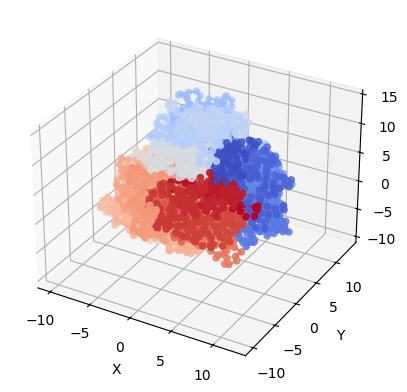

In [8]:
from auxiliar_functions import plot_traj
plot_traj(sim_chr10, beads=True, tube=True)

In [9]:
from OpenMiChroM.CndbTools import cndbTools
cndbTools = cndbTools()

In [20]:
chr10_traj = cndbTools.load('output_chr10/chr10_0.cndb')

In [21]:
first_frame = min([int(key) for key in chr10_traj.cndb.keys() if key != 'types'])
last_frame = max([int(key) for key in chr10_traj.cndb.keys() if key != 'types'])

In [44]:
chr10_xyz = cndbTools.xyz(frames=range(0,600,1), XYZ=[0,1,2])

In [45]:
chr10_xyz.shape

(600, 2712, 3)

Text(0.5, 0, 'Simulation Frames')

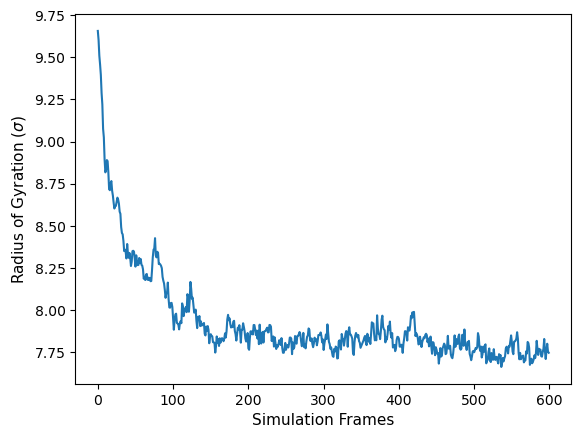

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl

chr10_RG = cndbTools.compute_RG(chr10_xyz)
plt.plot(chr10_RG)
plt.ylabel(r'Radius of Gyration ($\sigma$)',fontsize=11)
plt.xlabel(r'Simulation Frames',fontsize=11)

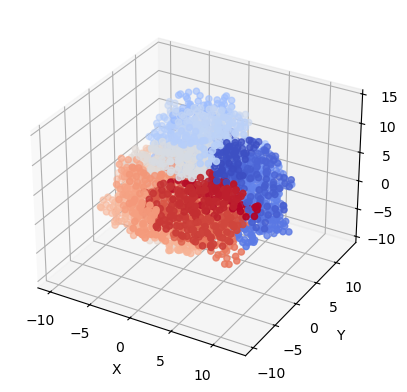

In [47]:
from auxiliar_functions import plot_traj
plot_traj(sim_chr10, beads=True, tube=False)

In [49]:
chr10_A1 = cndbTools.xyz(frames=range(0,600,1), beadSelection=chr10_traj.dictChromSeq[b'A1'], XYZ=[0,1,2])
chr10_B1 = cndbTools.xyz(frames=range(0,600,1), beadSelection=chr10_traj.dictChromSeq[b'B1'], XYZ=[0,1,2])

In [50]:
r_A1, RDP_chr10_A1 = cndbTools.compute_RDP(chr10_A1, radius=15.0, bins=200)
r_B1, RDP_chr10_B1 = cndbTools.compute_RDP(chr10_B1, radius=15.0, bins=200)

(0.005, 15.0)

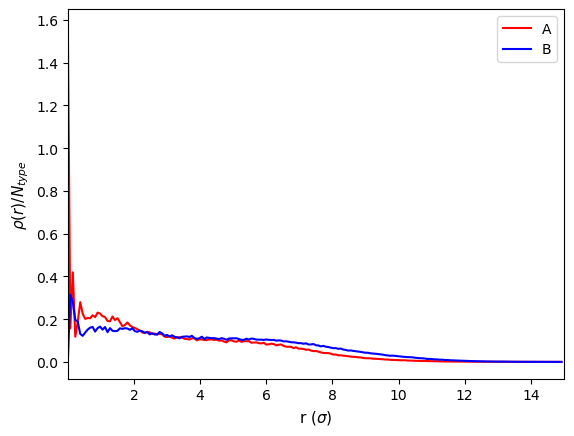

In [51]:
plt.plot(r_A1, RDP_chr10_A1, color='red', label='A')
plt.plot(r_B1, RDP_chr10_B1, color='blue', label='B')
plt.xlabel(r'r ($\sigma$)', fontsize=11,fontweight='normal', color='k')
plt.ylabel(r'$\rho(r)/N_{type}$', fontsize=11,fontweight='normal', color='k')
plt.legend()
plt.gca().set_xlim([1/200,15.0])

In [52]:
print("Generating the contact probability matrix...")
chr10_sim_HiC = cndbTools.traj2HiC(chr10_xyz)

Generating the contact probability matrix...
Reading frame 0 of 600
Reading frame 500 of 600


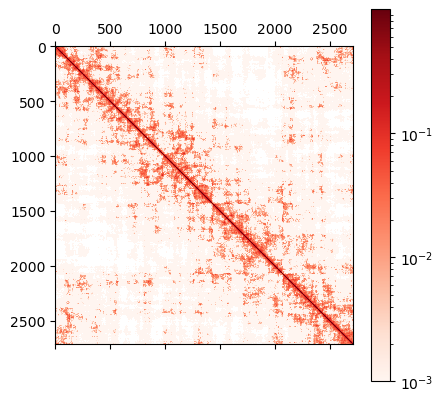

In [53]:
plt.matshow(chr10_sim_HiC, norm=mpl.colors.LogNorm(vmin=0.001, vmax=chr10_sim_HiC.max()),cmap="Reds")  
plt.colorbar()